## Test correct loading of training and validation data using PyTorch DataLoader
###### Author: Jan Klhufek (iklhufek@fit.vut.cz)

In [1]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch

# Load preferred dataloader if created a new one
from data_loaders import ImagenetLoader, Imagenet100Loader, Cifar10Loader

In [2]:
# Helper function for inline image display
def matplotlib_imshow(img: torch.Tensor, dataset: str, one_channel: bool = False) -> None:
    """
    Displays an image using matplotlib, with adjustments for channel normalization.

    This function unnormalizes the image tensor based on the dataset-specific normalization applied during data preparation. 
    It supports both one-channel and three-channel images.

    Args:
        img (torch.Tensor): The image tensor to be displayed.
        dataset (str): The name of the dataset which is used to determine the unnormalization parameters.
        one_channel (bool): If True, displays the image as a one-channel grayscale image. Defaults to False.

    Note:
        The function assumes that the image tensor is normalized and requires unnormalization using dataset-specific mean and standard deviation values.
    """
    if one_channel:
        img = img.mean(dim=0)

    # NOTE: Unnormalize the image based on the dataset-specific normalization done to the data! For example for greyscale MNIST: img = img / 2 + 0.5
    if dataset == "imagenet100" or dataset == "imagenet":
        mean = torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(-1, 1, 1)
    elif dataset == "cifar-10":
        mean = torch.tensor([0.4914, 0.4822, 0.4465]).view(-1, 1, 1)
        std = torch.tensor([0.247, 0.243, 0.261]).view(-1, 1, 1)

    img = img * std + mean
    npimg = img.numpy()

    # Plot the image
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [3]:
loader = Imagenet100Loader() # Choose preferred data loader based on dataset (NOTE: you may need to provide path to the dataset -> see the respective class)
print(f"Dataset: {loader.dataset}")
print(f"Classes: {loader.classes}")
print(f"Input size: {loader.input_size}")

# TEST this should return 0 since data has not been loaded yet
print("Loaded training data:")
print(f"Train data: {loader.num_train_data}")
print(f"Train total batches: {loader.num_train_batches}\n")

# LOAD TRAINING DATA
loader_train = loader.load_training_data(batch_size=4)
print("Loaded training data:")
print(f"Train data: {loader.num_train_data}")
print(f"Train total batches: {loader.num_train_batches}\n")

# LOAD VALIDATION DATA
loader_eval = loader.load_validation_data(batch_size=4)
print("Loaded validation data:")
print(f"Val data: {loader.num_val_data}")
print(f"Val total batches: {loader.num_val_batches}\n")    

Dataset: imagenet100
Classes: 100
Input size: 224
Loaded training data:
Training dataset not loaded. First, load it using `load_training_data` method.
Train data: 0
Training dataset not loaded. First, load it using `load_training_data` method.
Train total batches: 0

Creating training DataLoader..
Loaded training data:
Train data: 129395
Train total batches: 32349

Creating validation DataLoader..
Loaded validation data:
Val data: 5000
Val total batches: 1250



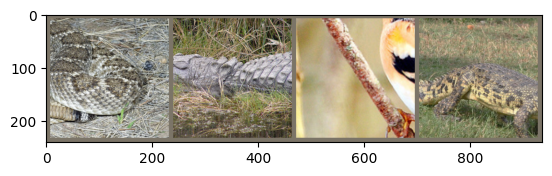

In [4]:
# Print sample training images
dataiter = iter(loader_train)
images, _ = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images, padding=8)
matplotlib_imshow(img_grid, dataset=loader.dataset, one_channel=False) # NOTE: if using greyscale dataset, use one_channel